In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pickle

In [3]:
def confidence_ellipse(val, cov, ax, n_std=1.0, facecolor='none', **kwargs):
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = val[0]

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = val[1]

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

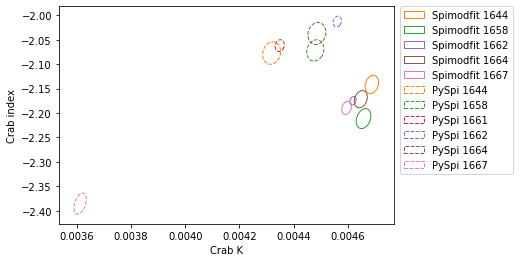

In [3]:
folders = [
    "spimodfit/1644_crab_only",
    "spimodfit/1658_crab_only",
    "spimodfit/1662_crab_only",
    "spimodfit/1664_crab_only",
    "spimodfit/1667_crab_only",
    "orbit_1644",
    "orbit_1658",
    "orbit_1661",
    "orbit_1662",
    "orbit_1664",
    "orbit_1667"
]
names = [
    "Spimodfit 1644",
    "Spimodfit 1658",
    "Spimodfit 1662",
    "Spimodfit 1664",
    "Spimodfit 1667",
    "PySpi 1644",
    "PySpi 1658",
    "PySpi 1661",
    "PySpi 1662",
    "PySpi 1664",
    "PySpi 1667"
]
edgecolors = [
    "C1",
    "C2",
    "C4",
    "C5",
    "C6",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("spimodfit_comparison.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

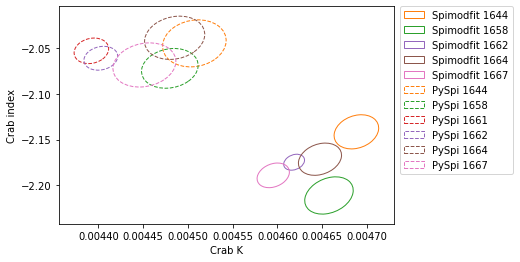

In [4]:
folders = [
    "spimodfit/1644_crab_only",
    "spimodfit/1658_crab_only",
    "spimodfit/1662_crab_only",
    "spimodfit/1664_crab_only",
    "spimodfit/1667_crab_only",
    "orbit_1644_wo_outliers",
    "orbit_1658",
    "orbit_1661_wo_outliers",
    "orbit_1662_wo_outliers",
    "orbit_1664_wo_outliers",
    "orbit_1667_spimodfit_wo_outliers"
]
names = [
    "Spimodfit 1644",
    "Spimodfit 1658",
    "Spimodfit 1662",
    "Spimodfit 1664",
    "Spimodfit 1667",
    "PySpi 1644",
    "PySpi 1658",
    "PySpi 1661",
    "PySpi 1662",
    "PySpi 1664",
    "PySpi 1667"
]
edgecolors = [
    "C1",
    "C2",
    "C4",
    "C5",
    "C6",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
]
linestyles = [
    "solid",
    "solid",
    "solid",
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("spimodfit_comparison_wo_outliers.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [ ]:
folders = [
    "spimodfit/1019_sec",
    "orbit_1019"
]
names = [
    "spimodfit_1019",
    "1019",
]
edgecolors = [
    "C1",
    "C1",
]
linestyles = [
    "solid",
    "dashed",
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("Crab K")
plt.ylabel("Crab index")
plt.savefig("spimodfit_comparison.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

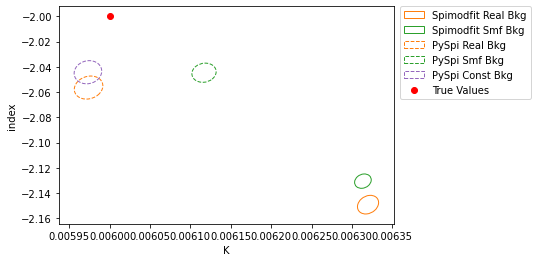

In [4]:
folders = [
    "spimodfit/0374_sim",
    "spimodfit/0374_sim_smf_bkg",
    "sim_source_0374",
    "sim_source_0374_w_smf_bkg",
    "sim_source_0374_const_bkg",
]
names = [
    "Spimodfit Real Bkg",
    "Spimodfit Smf Bkg",
    "PySpi Real Bkg",
    "PySpi Smf Bkg",
    "PySpi Const Bkg",
]
edgecolors = [
    "C1",
    "C2",
    "C1",
    "C2",
    "C4",
]
linestyles = [
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed"
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(0.006, -2, "ro", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
plt.savefig("0374_sim_source.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

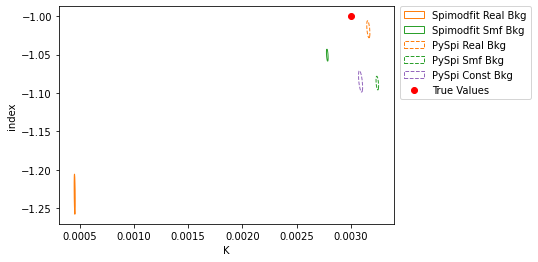

In [6]:
folders = [
    "spimodfit/1380_sim",
    "spimodfit/1380_sim_smf_bkg",
    "sim_source_1380",
    "sim_source_1380_w_smf_bkg",
    "sim_source_1380_const_bkg",
]
names = [
    "Spimodfit Real Bkg",
    "Spimodfit Smf Bkg",
    "PySpi Real Bkg",
    "PySpi Smf Bkg",
    "PySpi Const Bkg",
]
edgecolors = [
    "C1",
    "C2",
    "C1",
    "C2",
    "C4",
]
linestyles = [
    "solid",
    "solid",
    "dashed",
    "dashed",
    "dashed"
]

fig, ax = plt.subplots()
for folder, name, edgecolor, linestyle in zip(folders, names, edgecolors, linestyles):
    with open(f"./{folder}/crab_parameters.pickle", "rb") as f:
        val, cov = pickle.load(f)
    confidence_ellipse(val, cov, ax, 1, edgecolor=edgecolor, label=name, ls=linestyle)
plt.plot(0.003, -1, "ro", label="True Values")
ax.autoscale()
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xlabel("K")
plt.ylabel("index")
plt.savefig("1380_sim_source.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')